In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('energy.csv')

In [3]:
data

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [5]:
data.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [6]:
data.dropna(inplace = True)

In [7]:
data

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'SquareFootage'}>,
        <Axes: title={'center': 'Occupancy'}>],
       [<Axes: title={'center': 'RenewableEnergy'}>,
        <Axes: title={'center': 'EnergyConsumption'}>]], dtype=object)

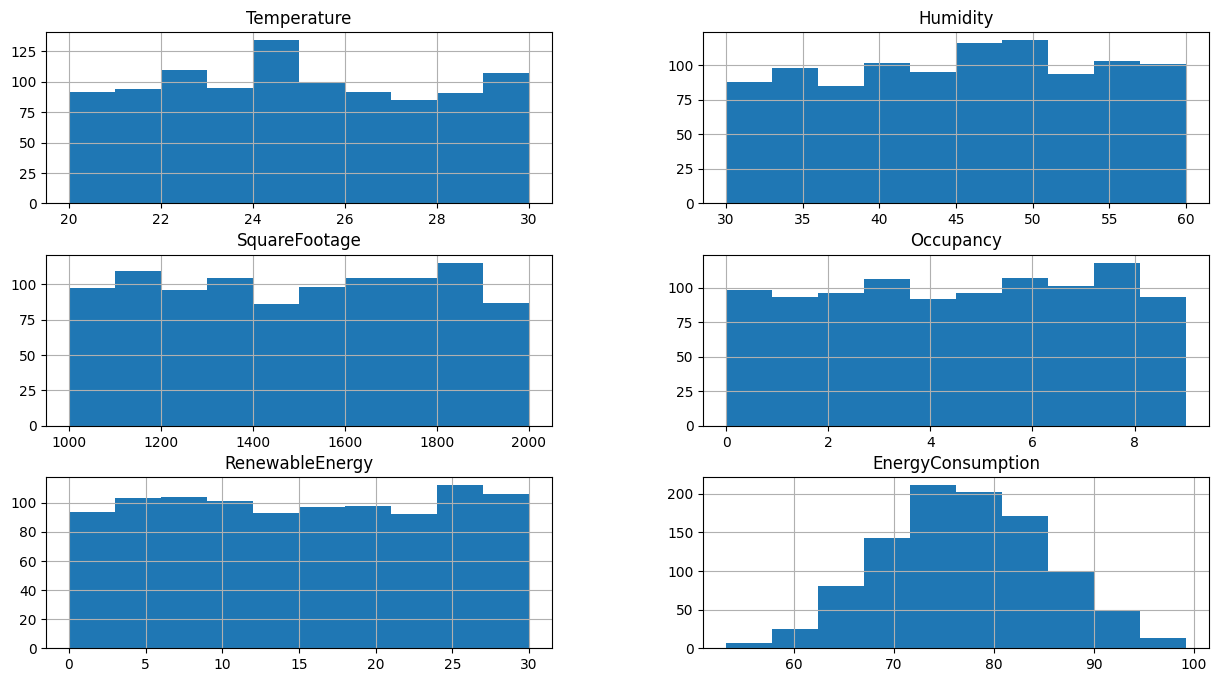

In [8]:
data.hist(figsize=(15,8))

<Axes: xlabel='EnergyConsumption'>

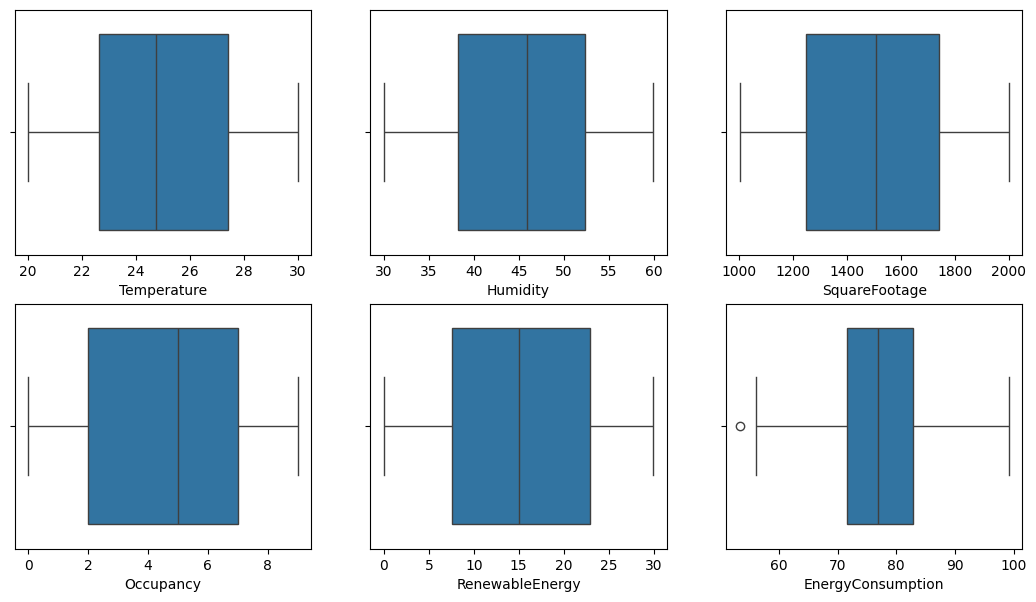

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(13, 7))

sns.boxplot(x=data['Temperature'], ax=axes[0][0])
sns.boxplot(x=data['Humidity'], ax=axes[0][1])
sns.boxplot(x=data['SquareFootage'], ax=axes[0][2])
sns.boxplot(x=data['Occupancy'], ax=axes[1][0])
sns.boxplot(x=data['RenewableEnergy'], ax=axes[1][1])
sns.boxplot(x=data['EnergyConsumption'], ax=axes[1][2])

In [10]:
data.corr

<bound method DataFrame.corr of                Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0    2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1    2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2    2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3    2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4    2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   
..                   ...          ...        ...            ...        ...   
995  2022-02-11 11:00:00    28.619382  48.850160    1080.087000          5   
996  2022-02-11 12:00:00    23.836647  47.256435    1705.235156          4   
997  2022-02-11 13:00:00    23.005340  48.720501    1320.285281          6   
998  2022-02-11 14:00:00    25.138365  31.306459    1309.079719          3   
999  2022-02-11 15:00:00    23.051165  42.615421    1018.140606          6   

    HVACUsage LightingUsage  Re

In [11]:
data = data.drop('Timestamp', axis=1)

In [12]:
data

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...
995,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


In [13]:
data["HVACUsage"] = data["HVACUsage"].map({"On": 1, "Off": 0})
data["LightingUsage"] = data["LightingUsage"].map({"On": 1, "Off": 0})
data["Holiday"] = data["Holiday"].map({"Yes": 1, "No": 0})


In [14]:
data

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,Monday,0,75.364373
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,Saturday,0,83.401855
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,Sunday,0,78.270888
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,Wednesday,0,56.519850
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,Friday,0,70.811732
...,...,...,...,...,...,...,...,...,...,...
995,28.619382,48.850160,1080.087000,5,0,0,21.194696,Saturday,0,82.306692
996,23.836647,47.256435,1705.235156,4,0,1,25.748176,Tuesday,1,66.577320
997,23.005340,48.720501,1320.285281,6,0,1,0.297079,Friday,1,72.753471
998,25.138365,31.306459,1309.079719,3,1,0,20.425163,Thursday,1,76.950389


<Axes: xlabel='Temperature', ylabel='EnergyConsumption'>

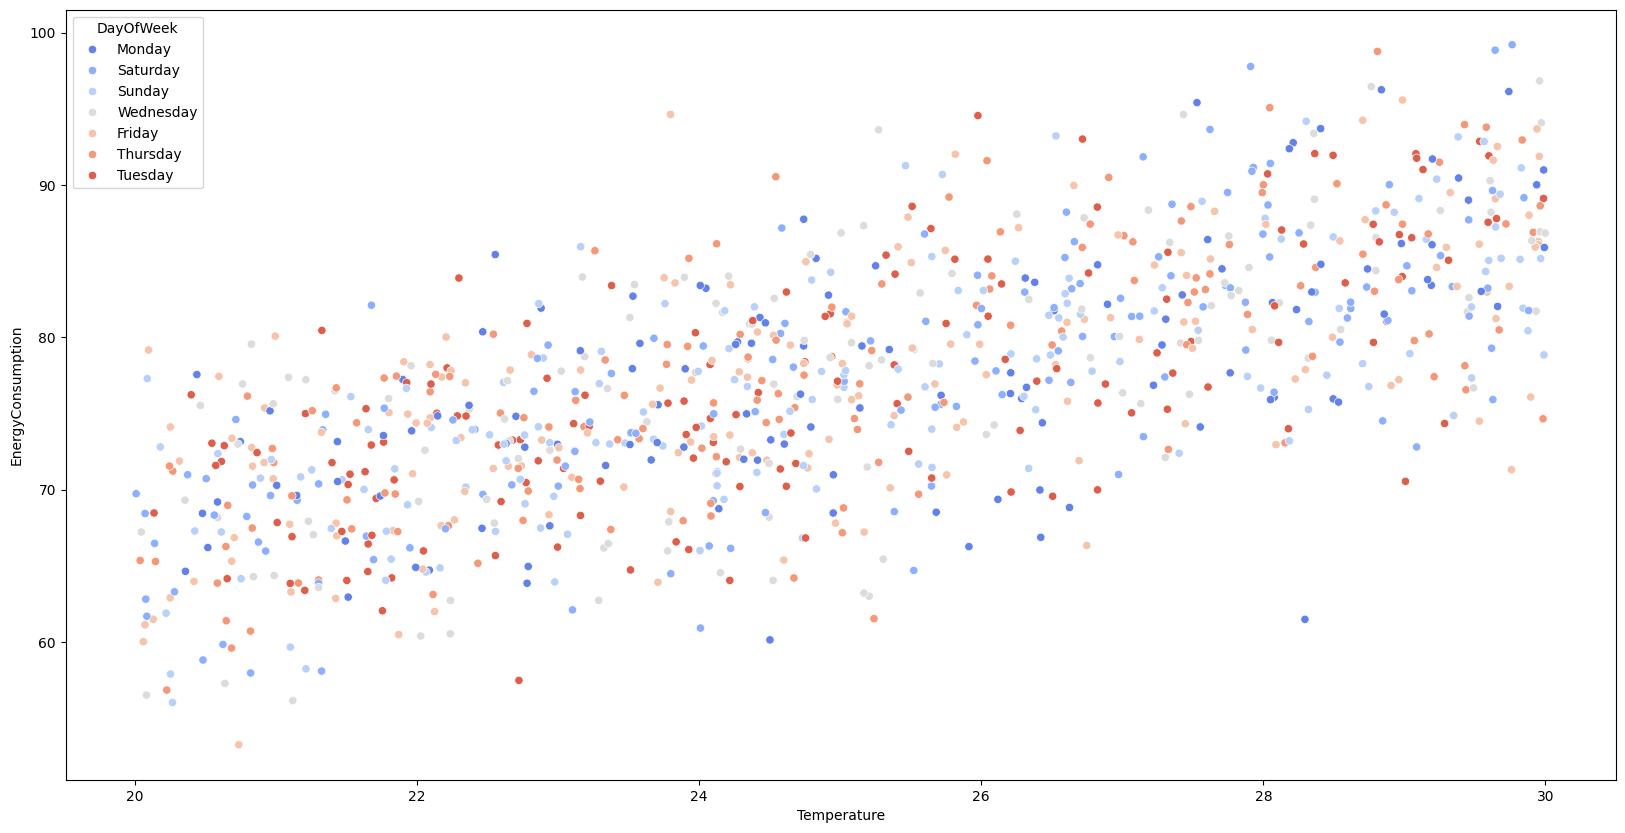

In [15]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Temperature', y='EnergyConsumption', hue='DayOfWeek', palette='coolwarm', data=data)

In [16]:

data = pd.get_dummies(data, columns=["DayOfWeek"], drop_first=True)

In [17]:
data

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,0,75.364373,True,False,False,False,False,False
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,0,83.401855,False,True,False,False,False,False
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,0,78.270888,False,False,True,False,False,False
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,0,56.519850,False,False,False,False,False,True
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,70.811732,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28.619382,48.850160,1080.087000,5,0,0,21.194696,0,82.306692,False,True,False,False,False,False
996,23.836647,47.256435,1705.235156,4,0,1,25.748176,1,66.577320,False,False,False,False,True,False
997,23.005340,48.720501,1320.285281,6,0,1,0.297079,1,72.753471,False,False,False,False,False,False
998,25.138365,31.306459,1309.079719,3,1,0,20.425163,1,76.950389,False,False,False,True,False,False


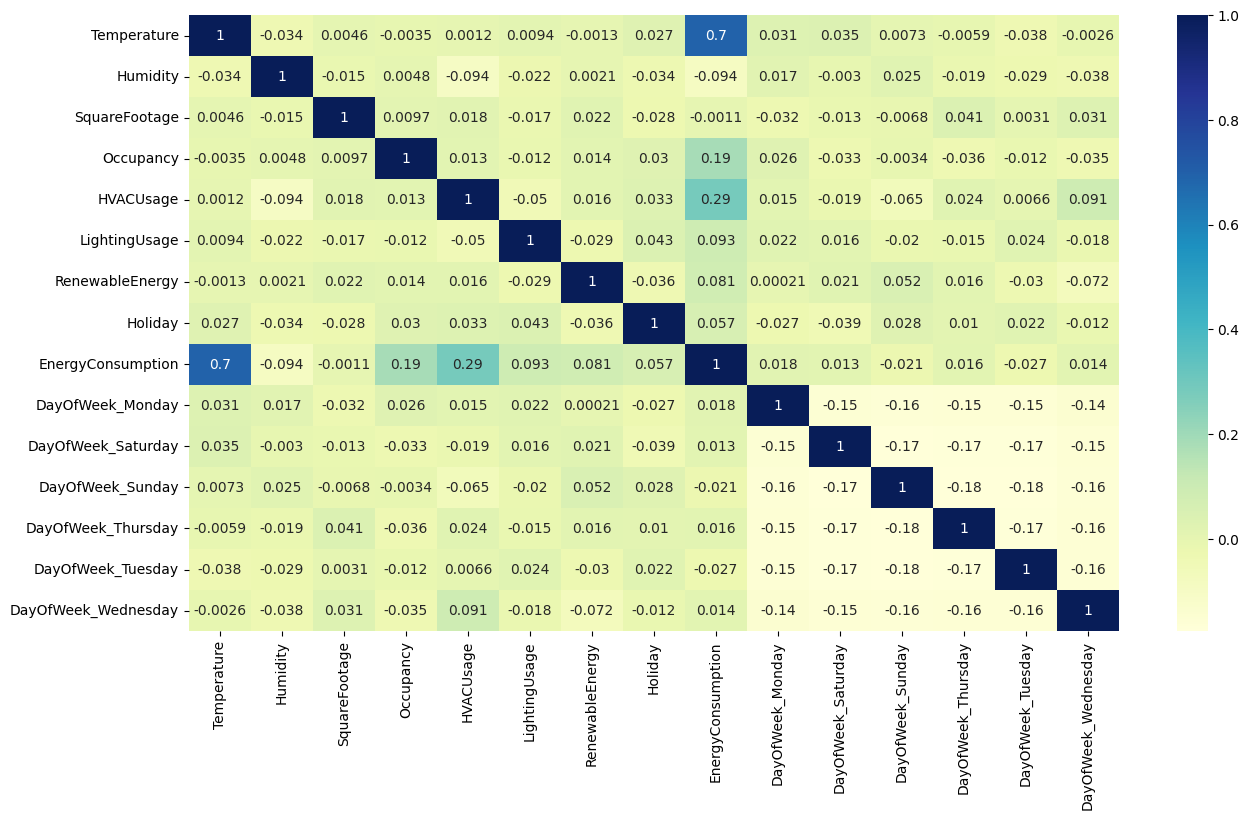

In [18]:

plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [19]:

data = pd.get_dummies(data).astype(int)

In [20]:
data

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,25,43,1565,5,1,0,2,0,75,1,0,0,0,0,0
1,27,54,1411,1,1,1,21,0,83,0,1,0,0,0,0
2,28,58,1755,2,0,0,6,0,78,0,0,1,0,0,0
3,20,50,1452,1,0,1,8,0,56,0,0,0,0,0,1
4,23,51,1094,9,1,0,3,0,70,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28,48,1080,5,0,0,21,0,82,0,1,0,0,0,0
996,23,47,1705,4,0,1,25,1,66,0,0,0,0,1,0
997,23,48,1320,6,0,1,0,1,72,0,0,0,0,0,0
998,25,31,1309,3,1,0,20,1,76,0,0,0,1,0,0


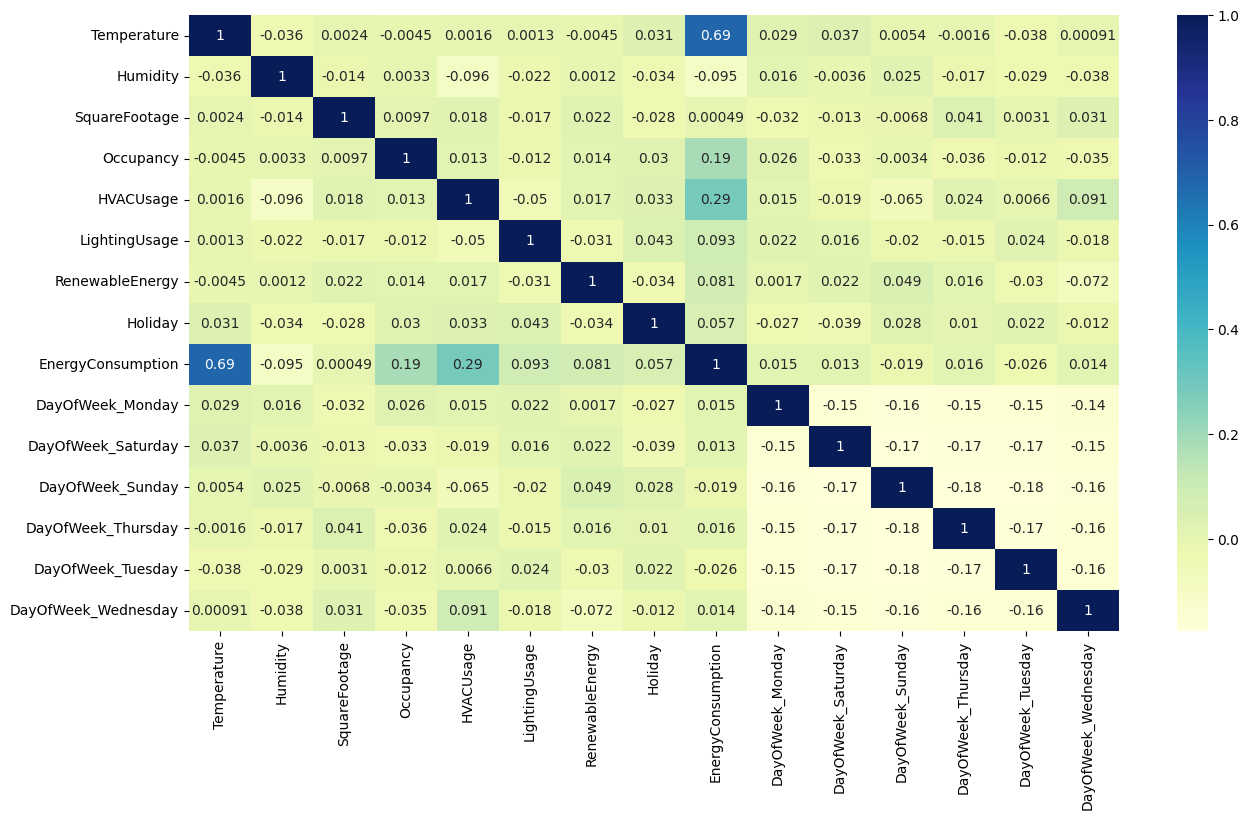

In [21]:

plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [22]:

from sklearn.model_selection import train_test_split

x = data.drop(['EnergyConsumption'], axis=1)
y = data['EnergyConsumption']

In [23]:
x

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,25,43,1565,5,1,0,2,0,1,0,0,0,0,0
1,27,54,1411,1,1,1,21,0,0,1,0,0,0,0
2,28,58,1755,2,0,0,6,0,0,0,1,0,0,0
3,20,50,1452,1,0,1,8,0,0,0,0,0,0,1
4,23,51,1094,9,1,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28,48,1080,5,0,0,21,0,0,1,0,0,0,0
996,23,47,1705,4,0,1,25,1,0,0,0,0,1,0
997,23,48,1320,6,0,1,0,1,0,0,0,0,0,0
998,25,31,1309,3,1,0,20,1,0,0,0,1,0,0


In [24]:
y

0      75
1      83
2      78
3      56
4      70
       ..
995    82
996    66
997    72
998    76
999    71
Name: EnergyConsumption, Length: 1000, dtype: int64

In [25]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [27]:

predict = model.predict(x_test)

In [28]:
predict

array([84.02461896, 81.62207561, 76.30029671, 87.034452  , 75.25416063,
       80.03213604, 78.40438114, 72.06289454, 77.88430214, 67.51498523,
       77.24904032, 73.46991468, 77.34505514, 78.51794356, 77.13750942,
       70.63782706, 77.60939053, 78.09658367, 74.64792169, 65.88957828,
       74.63917086, 73.61523663, 82.03489256, 76.82062824, 86.86837003,
       73.65348054, 78.09300129, 70.41065151, 74.93740461, 79.80748571,
       69.2739914 , 81.39691649, 73.47702949, 87.24799945, 78.75326947,
       87.20128851, 86.23986966, 77.47917023, 77.85734801, 79.76152089,
       74.80224225, 81.79651773, 68.00053046, 76.28006164, 73.96361891,
       79.46200367, 75.50212081, 70.19480373, 71.59501239, 76.47318749,
       77.89038675, 84.6786015 , 73.4440306 , 69.36286166, 77.40559276,
       88.31947084, 76.52300523, 78.2680531 , 82.32136126, 74.91413361,
       67.16141154, 87.41058219, 69.33865377, 67.16359762, 66.96403869,
       86.16766476, 75.9240609 , 68.13484281, 70.13815424, 74.40

In [32]:
from sklearn.metrics import mean_squared_error , r2_score

mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

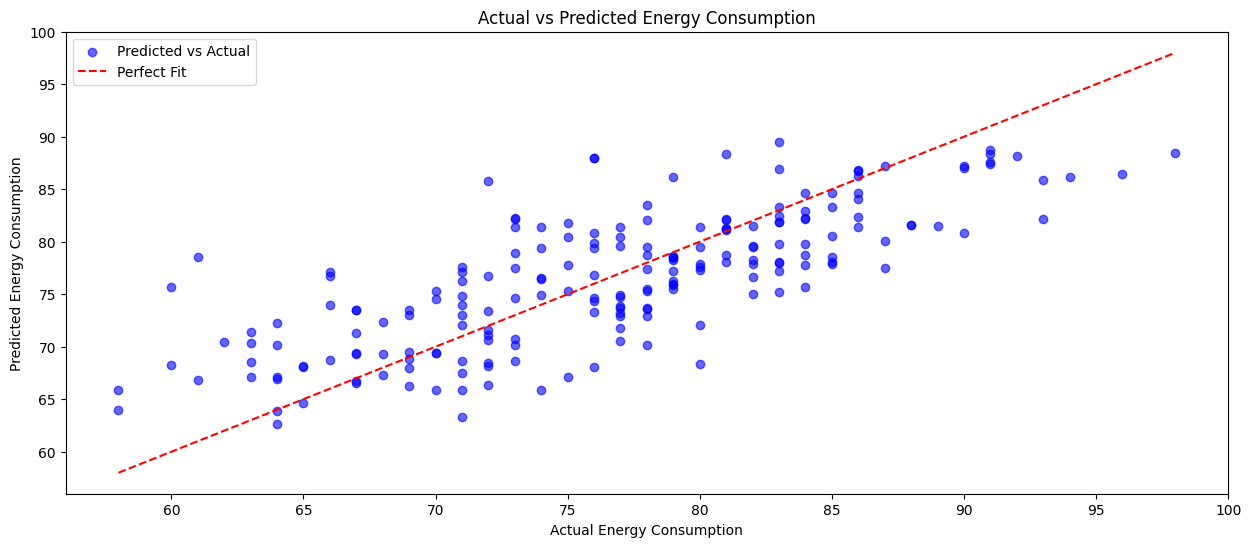

In [40]:

plt.figure(figsize=(15, 6))
plt.scatter(y_test, predict, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.legend()
plt.show()

In [42]:

print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
for feature, coef in zip(x.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")


Model Coefficients:
Intercept: 22.76
Temperature: 1.9921
Humidity: -0.0340
SquareFootage: -0.0003
Occupancy: 0.5057
HVACUsage: 4.5613
LightingUsage: 1.7119
RenewableEnergy: 0.0983
Holiday: 0.4274
DayOfWeek_Monday: -0.0239
DayOfWeek_Saturday: 0.3501
DayOfWeek_Sunday: -0.0982
DayOfWeek_Thursday: 0.3131
DayOfWeek_Tuesday: -0.1026
DayOfWeek_Wednesday: -0.2780
